# Class Activation Mapping - Proof-of-Concept

**Author**: Johannes S. Fischer

Visualize where a neural network looks at ([paper](https://openaccess.thecvf.com/content_cvpr_2016/html/Zhou_Learning_Deep_Features_CVPR_2016_paper.html)).

In [37]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

from ModelGenerator import get_base_model2

## Settings

In [18]:
# image shape
IMG_SHAPE = (100, 100, 3)

# model
model_name = 'FERplus-impr-std_0124-1040_weights.h5'
model = get_base_model2(IMG_SHAPE)
model.add(tf.keras.layers.Dense(7, activation='softmax', name="softmax"))
model.load_weights('./models/' + model_name)

# last convolutional name
LAST_CONV_NAME = 'block3_conv3'

In [19]:
def preprocess(x):
    mean = [129.4432, 129.4432, 129.4432]
    std = [64.87448751, 64.87448751, 64.87448751]
    # ensure image format
    x = np.array(x, dtype='float32')
    # normalize
    x[..., 0] -= mean[0]
    x[..., 1] -= mean[1]
    x[..., 2] -= mean[2]
    if std is not None:
        x[..., 0] /= std[0]
        x[..., 1] /= std[1]
        x[..., 2] /= std[2] 
    return x

emotion_labels = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear']
def vec2label(onehot_vec):
    major_vote = np.argmax(onehot_vec)
    return emotion_labels[major_vote]

In [38]:
# image shape
IMG_SHAPE = (100, 100, 3)

# model
model_name = 'RAF-impr-std_0124-1008_weights.h5'
model = get_base_model2(IMG_SHAPE)
model.add(tf.keras.layers.Dense(7, activation='softmax', name="softmax"))
model.load_weights('./models/' + model_name)

# last convolutional name
LAST_CONV_NAME = 'block3_conv3'

# preprocessing function for model
def preprocess(x):
    mean = [146.6770, 114.6274, 102.3102]
    std = [67.6282, 61.7651, 61.3665]
    # ensure image format
    x = np.array(x, dtype='float32')
    # normalize
    x[..., 0] -= mean[0]
    x[..., 1] -= mean[1]
    x[..., 2] -= mean[2]
    if std is not None:
        x[..., 0] /= std[0]
        x[..., 1] /= std[1]
        x[..., 2] /= std[2] 
    return x

## Input Images

In [45]:
# multiple images
image_names = ['RAF/test_0266_aligned.jpg', 'RAF/test_0001_aligned.jpg', 'happy.png']
images = []
for name in image_names:
    img = cv2.imread('./data/' + name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

In [40]:
# single image
images = img = cv2.imread('./data/happy.png')
images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)

## Visualizer Class

In [46]:
from Visualizer import Visualizer

vis = Visualizer(model, IMG_SHAPE, LAST_CONV_NAME, preprocess)

heatmaps, preds = vis.get_CAM(images)

Maximum index 3 with confidence 95.08%
Maximum index 4 with confidence 93.38%
Maximum index 3 with confidence 89.17%


## Results

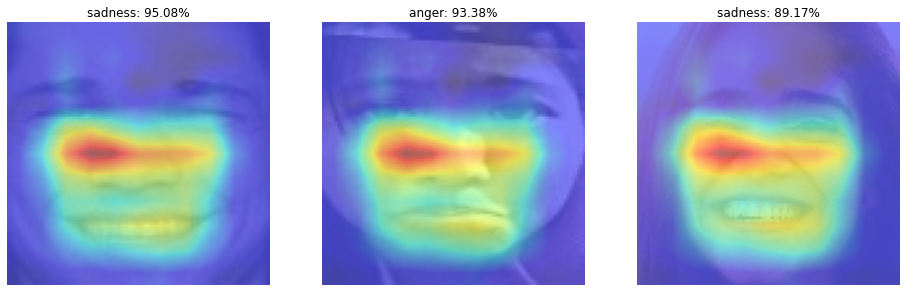

In [47]:
if isinstance(images, list):
    plt.subplots(1, len(images), figsize=(16,6))
    for idx, image in enumerate(images):
        x = cv2.resize(image, IMG_SHAPE[:2])
        plt.subplot(1, len(images), idx+1)
        plt.imshow(x, alpha=0.5)
        plt.imshow(heatmaps[idx], cmap='jet', alpha=0.5)
        plt.title(f'{vec2label(preds[idx])}: {np.max(preds[idx])*100:.2f}%')
        plt.axis('off')
else:
    plt.figure(figsize=(10,10))
    x = cv2.resize(images, IMG_SHAPE[:2])
    plt.imshow(x, alpha=0.5)
    plt.imshow(heatmaps[0], cmap='jet', alpha=0.5)
    plt.title(f'{vec2label(preds[0])}: {np.max(preds[0])*100:.2f}%')
    plt.axis('off')
    
plt.show()

---